In [133]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [92]:
train_df=pd.read_csv("Training Dataset.csv")

In [93]:
test_df=pd.read_csv("Test Dataset.csv")

In [94]:
submi_df=pd.read_csv("Sample_Submission.csv")

In [95]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [96]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [97]:
train_df.shape

(614, 13)

In [98]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

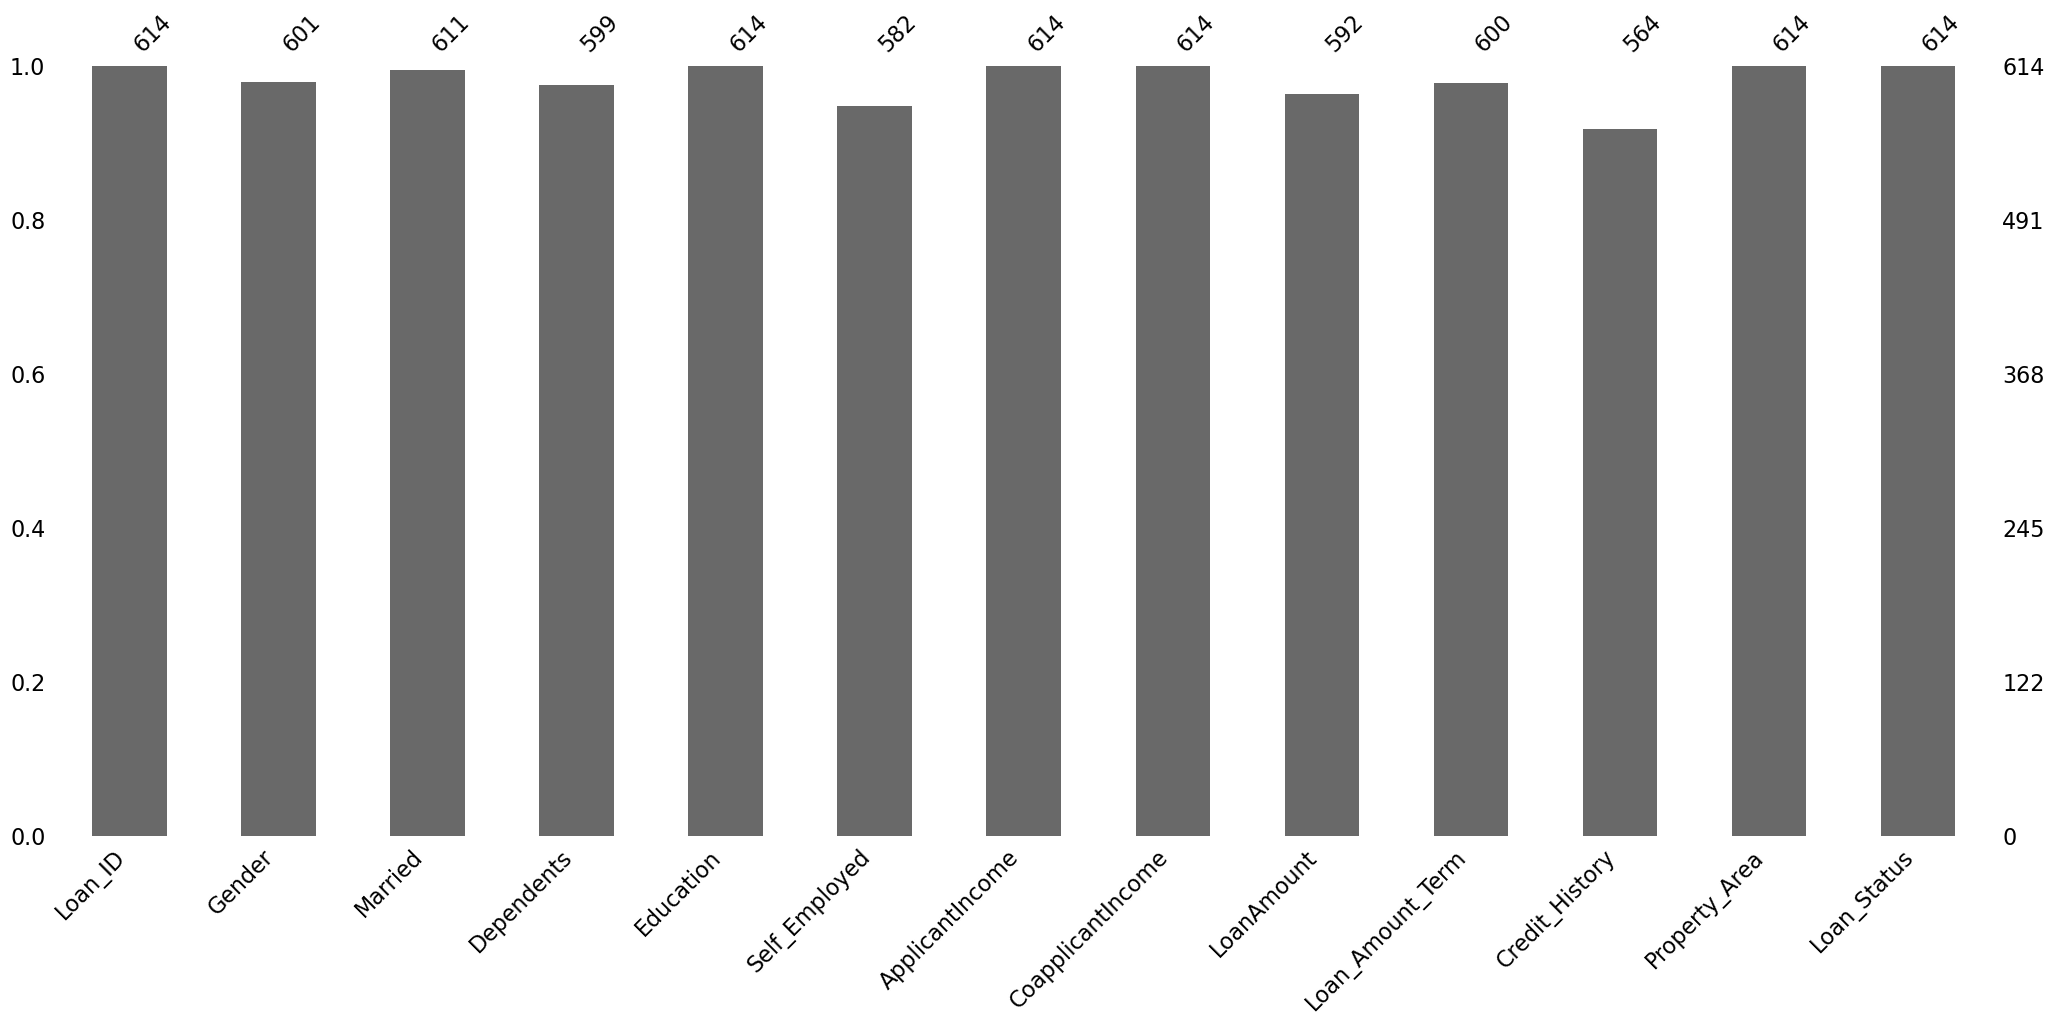

In [99]:
msno.bar(train_df)

In [100]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [101]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [102]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [103]:
test_df.shape

(367, 12)

In [104]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [105]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


<Axes: >

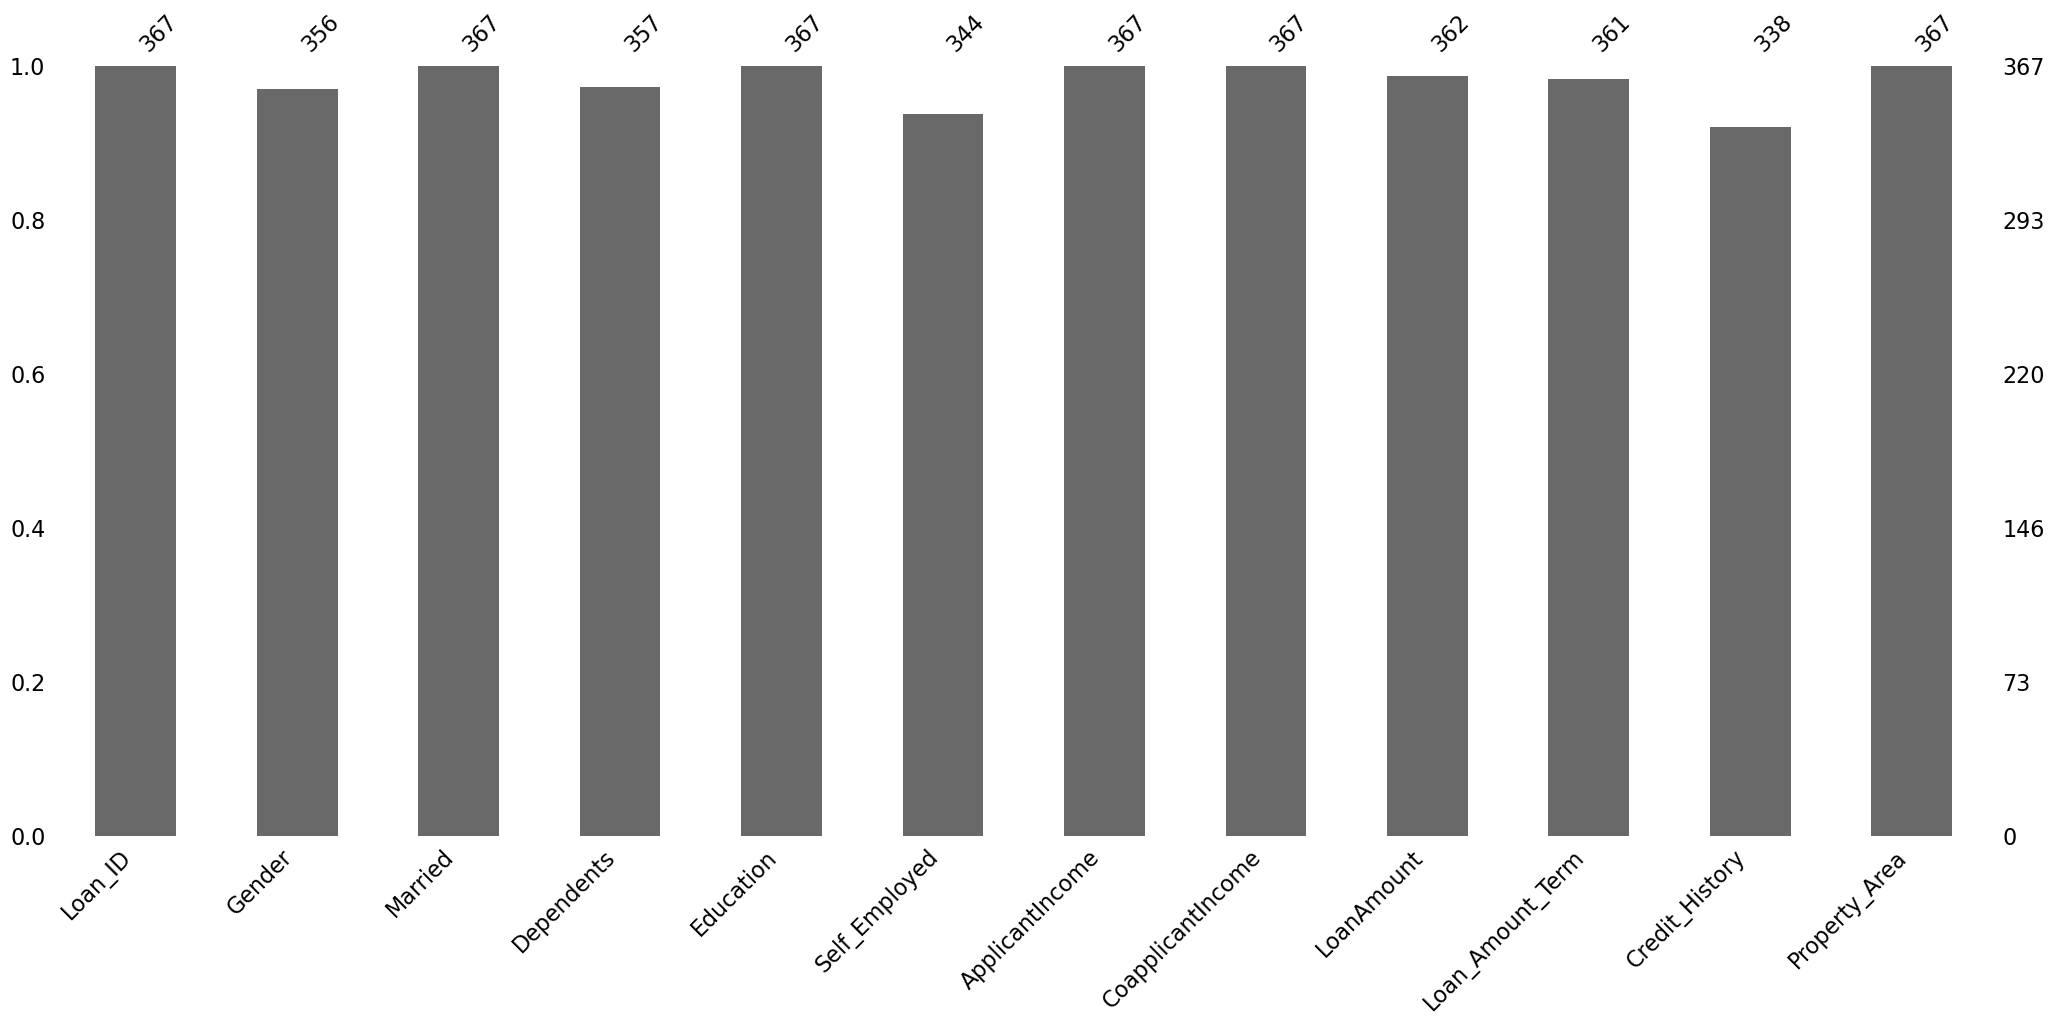

In [106]:
msno.bar(test_df)

In [107]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [108]:
test_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [110]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


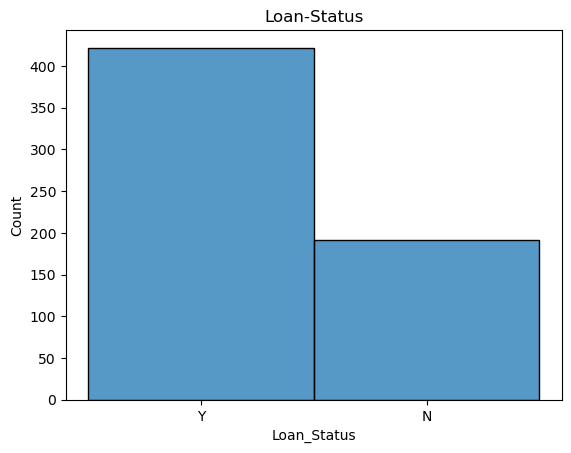

In [113]:
sns.histplot(x='Loan_Status', data=train_df)
plt.title('Loan-Status')
plt.show()

In [115]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [114]:
print(train_df['Gender'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64


In [116]:
print(train_df['Married'].value_counts())

Married
Yes    398
No     213
Name: count, dtype: int64


In [117]:
print(train_df['Dependents'].value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [118]:
print(train_df['Education'].value_counts())

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [120]:
print(train_df['Self_Employed'].value_counts())

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [121]:
print(train_df['Property_Area'].value_counts())

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


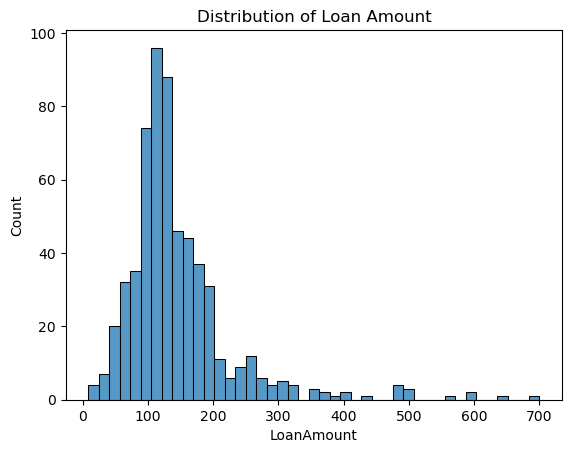

In [122]:
sns.histplot(train_df['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.show()

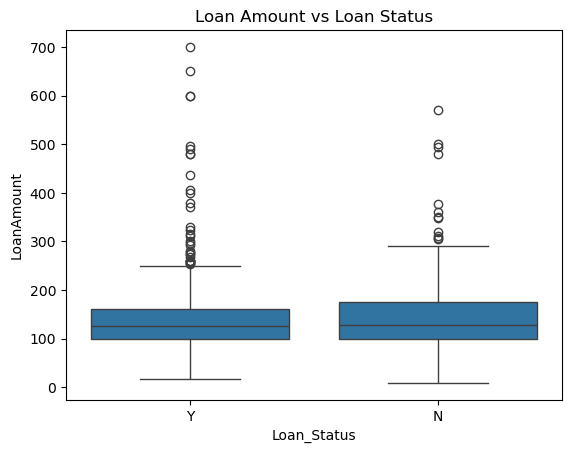

In [123]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title('Loan Amount vs Loan Status')
plt.show()

In [125]:
train_df['Gender'] = train_df['Gender'].fillna('Unknown')
train_df['Married'] = train_df['Married'].fillna('Unknown')
train_df['Dependents'] = train_df['Dependents'].fillna('0')
train_df['Self_Employed'] = train_df['Self_Employed'].fillna('No')
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0])
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])

In [126]:
test_df['Gender'] = test_df['Gender'].fillna('Unknown')
test_df['Dependents'] = test_df['Dependents'].fillna('0')
test_df['Self_Employed'] = test_df['Self_Employed'].fillna('No')
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0])
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [129]:
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_df['Loan_Status']
test_X = test_df.drop(['Loan_ID'], axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)
test_X_processed = preprocessor.transform(test_X)

In [132]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

test_predictions = model.predict(test_X_processed)

submi_df['Loan_Status'] = label_encoder.inverse_transform(test_predictions)
submi_df.to_csv("Submission.csv", index=False)
print("Submission file created.")

Validation Accuracy: 0.7886178861788617
Submission file created.


In [136]:
conf_matrix = confusion_matrix(y_val, y_pred, labels=np.unique(y_pred))

<Figure size 800x600 with 0 Axes>

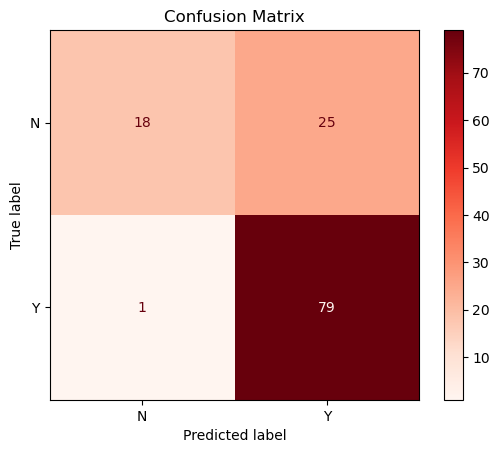

In [138]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Reds, values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [146]:
print(submi_df.head(15))

     Loan_ID Loan_Status
0   LP001015           Y
1   LP001022           Y
2   LP001031           Y
3   LP001035           Y
4   LP001051           Y
5   LP001054           Y
6   LP001055           Y
7   LP001056           N
8   LP001059           Y
9   LP001067           Y
10  LP001078           Y
11  LP001082           Y
12  LP001083           Y
13  LP001094           N
14  LP001096           Y
